## Clasificación y PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
d_ceph=pd.read_csv('train_senior.csv')
d_ceph2=pd.read_csv('test1_senior.csv')
d_ceph3=pd.read_csv('test2_senior.csv')

In [3]:
df=pd.concat([d_ceph,d_ceph2])
df=pd.concat([df,d_ceph3])
df=df.drop(['image_path'],axis=1)
datab=df.copy()
datab=datab.to_numpy().astype(float)
datab.shape

(400, 38)

# Preprocesamiento de los datos.

In [4]:
def d_p(a,b): 
    x1=a.iloc[:,0]
    y1=a.iloc[:,1]
    x2=b.iloc[:,0]
    y2=b.iloc[:,1]
    return np.sqrt((x1-x2)**2+(y1-y2)**2)
    #return np.linalg.norm(a-b)

In [5]:
#distancia condilion-golion 19-10
d_cg=d_p(df[['19_x','19_y']].astype(float),df[['10_x','10_y']].astype(float))
# Distancia entre dientes superiores e inferiores 11-12
d_sup_inf=d_p(df[['11_x','11_y']].astype(float),df[['12_x','12_y']].astype(float))
# Distancia de gonion a menton 10-8
d_gon_ment=d_p(df[['10_x','10_y']].astype(float),df[['8_x','8_y']].astype(float))
# distancia de nasion a sub espinal 2-5
d_nas_sub=d_p(df[['2_x','2_y']].astype(float),df[['5_x','5_y']].astype(float))
# Distancia nariz-menton 15-16
d_nas_men=d_p(df[['15_x','15_y']].astype(float),df[['16_x','16_y']].astype(float))
# Distancia labios 13-14
d_lab=d_p(df[['13_x','13_y']].astype(float),df[['14_x','14_y']].astype(float))


C:\Users\aldoa\AppData\Local\Temp\ipykernel_8852\2721853312.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data_b.hist(ax = ax)


array([[<AxesSubplot:title={'center':'d_cg'}>,
        <AxesSubplot:title={'center':'d_sup_inf'}>],
       [<AxesSubplot:title={'center':'d_gon_ment'}>,
        <AxesSubplot:title={'center':'d_nas_sub'}>],
       [<AxesSubplot:title={'center':'d_nas_men'}>,
        <AxesSubplot:title={'center':'d_lab'}>]], dtype=object)

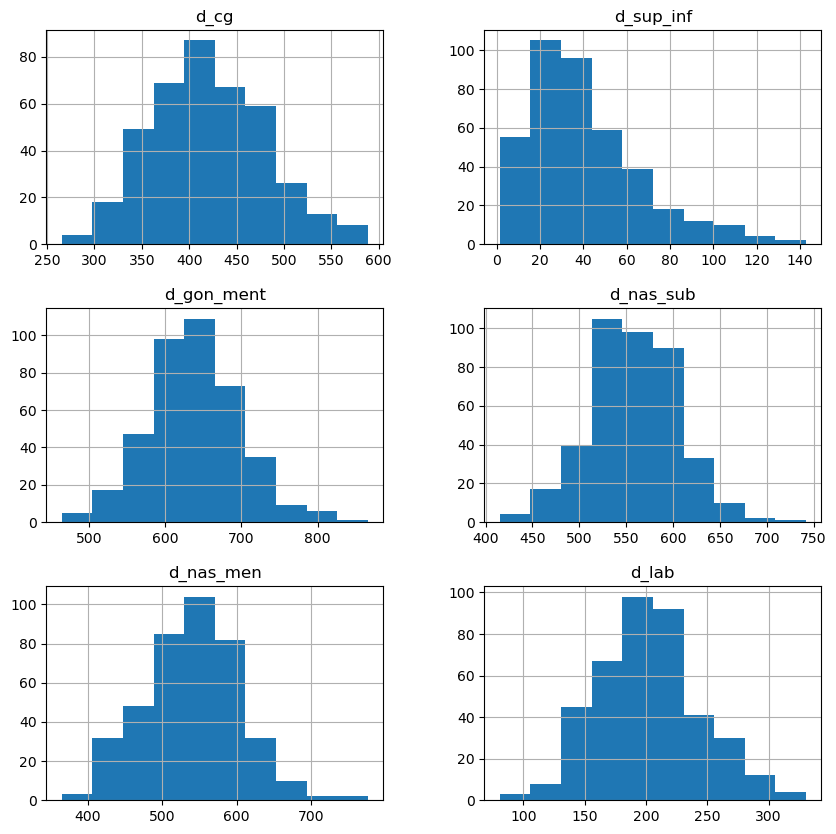

In [6]:
data_b=pd.concat([d_cg,d_sup_inf,d_gon_ment,d_nas_sub,d_nas_men,d_lab],axis=1)
data_b.columns=['d_cg','d_sup_inf','d_gon_ment','d_nas_sub','d_nas_men','d_lab']

fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data_b.hist(ax = ax)
#data_b.hist()


# PCA
Para realizar el algoritmo de PCA se deben seguir los siguientes pasos:

1. Obtener los datos —en todas sus dimensiones—
2. Restar la media. Para que PCA funcione de manera correcta, se requiere restar la media de cada dimensión.
3. Calcular la matriz de covarianza.
4. Calcular los eigenvalores y los eigenvectores de la matriz de covarianza.
5. Escoger los componentes y formar el vector de características. De la columna de los eigenvalores, el elemento con el número mayor es el componente principal del set de datos.
6. En general, una vez que los eigenvectores se encuentran en la matriz de covarianza, se ordenan de mayor a menor dando estos los componentes principales en orden.

* Calcular eigenvalores y eigenvectores [fuente eigenvalores](http://gmc.geofisica.unam.mx/papime2020/index.php/articulos/38-eigenvalores-y-eigenvectores#:~:text=De%20manera%20semejante%20podemos%20definir,eigenvalores%20de%20una%20matriz%20M.&text=M%E2%86%92x%3D%CE%BB%E2%86%92,asociado%20al%20eigenvector%20%E2%86%92x%20.) además de [eigenvalores y eigenvectores 2](https://www.matricesydeterminantes.com/matrices/calcular-valores-propios-autovalores-y-vectores-propios-autovectores-de-una-matriz/).


Sea $V$ un espacio vectorial sobre un campo $K$ y sea $T$ una transformación lineal
$$T:V \rightarrow V $$

un vector $\overset{\rightarrow}{v}_0 ≠ 0$ del espacio vectorial $V$ se denomina un eigenvector de T si existe un escalar  $λ ∈ K$ tal que

$$T(\overset{\rightarrow}{v}_0)=\lambda\overset{\rightarrow}{v}_0 $$

en este caso $λ ∈ K$ se denomina el eigenvalor de la transformación $T$ asociado al eigenvector $\overset{\rightarrow}{v}_0$

De manera semejante podemos definir los eigenvectores y eigenvalores de una matriz $M$.

Sea $M ∈ K_{nxn}$ para algún número natural $n$, un elemento $x \in K_n$ se denomina un eigenvector de $M$ si existe un escalar $λ ∈ K$ tal que

$$M \overset{\rightarrow}{x}=\lambda \overset{\rightarrow}{x}$$

en este caso $λ ∈ K$ se denomna eigenvalor de la matriz $M$ asociado al eigenvector $\overset{\rightarrow}{x}$.

**Entonces para calcular los eigenvalores y los eigenvectores se debe:**
1. Realizar la operación del determinante de la matriz menos la identidad por lambda:
$$\det(A-\lambda I)$$

donde: 

$$\lambda I=
\begin{bmatrix}
    \lambda & 0 & \cdots & 0\\
    0 & \lambda & \cdots & 0\\
    \vdots & 0 & \lambda & 0\\
    \vdots & \vdots & \vdots & \ddots 
\end{bmatrix}_{nxn}
$$
2. Se hayan las raices del polinomio formado (resolver para $\lambda$)

$$\det(A-\lambda I)=0 \rightarrow \lambda$$

3. Se calcula el vector propio resolviendo el sistema de ecuaciones para cada eigenvalor

$$(A-\lambda I)v=0 $$

**Propiedades de los eigenvalores y eigenvectores**
1. La traza de la matriz (suma de su diagonal principal) es igual a la suma de todos los valores propios:
$$ tr(A)=\sum_{i=1}^n \lambda_i$$
2. El producto de todos los valores propios es igual al determinante de la matriz.
$$ \det(A)= \prod_{i=1}^{n} \lambda_i$$
3. Si existe alguna combinación lineal entre filas o columnas, como minímo un valor propio de la matriz es igual a $0$

In [7]:
def covarianza(X,Y):
    x_mean = X.mean()
    y_mean = Y.mean()
    n = len(X)
    cov = (((X-x_mean)*(Y-y_mean)).sum())/(n-1)
    return cov

def matriz_cov(data):
    atributos = data.columns
    n = len(atributos)
    m = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            X = data[atributos[i]]
            Y = data[atributos[j]]
            m[i][j] = covarianza(X,Y)
    return m

def pca1(data): # Ya tiene que estar normalizado
    atributos = list(data.columns)
    n = len(atributos)
    for a in atributos:
        data[a]=data[a]-data[a].mean()
    #m_cov=matriz_cov(data)
    m_cov=np.cov(np.transpose(data))
    sns.heatmap(m_cov,annot=True)
    eival,eivec=np.linalg.eig(m_cov)
    p=(eival/eival.sum())*100
    return p,eivec

def norm_min_max(x,a,b): # Para todo el dataFrame
    l=list(x.columns)
    v_max=0
    v_min=0
    res=pd.DataFrame()
    for val in l:
        v_max=x[val].max()
        v_min=x[val].min()
        r_dt=v_max-v_min
        r_norm=b-a
        d=x[val]-v_min
        dpct=d/r_dt
        dnorm=r_norm*dpct
        data=a+dnorm
        aa=pd.DataFrame(data,columns=[val])
        res[val]=data
    return res

def ordenar(porcentajes,columnas):
    n=len(columnas)
    p2=porcentajes.copy()
    porcentaje=np.sort(porcentajes)[::-1]
    dicti={}
    for a in range(n):
        ub=int(np.where(porcentaje[a]==p2)[0])
        dicti[columnas[ub]]=porcentaje[a]
    return dicti

{'d_cg': 36.04072130342554, 'd_lab': 21.34712266379575, 'd_nas_men': 16.032413373957308, 'd_nas_sub': 12.442237832788472, 'd_gon_ment': 8.892535879862113, 'd_sup_inf': 5.244968946170824}


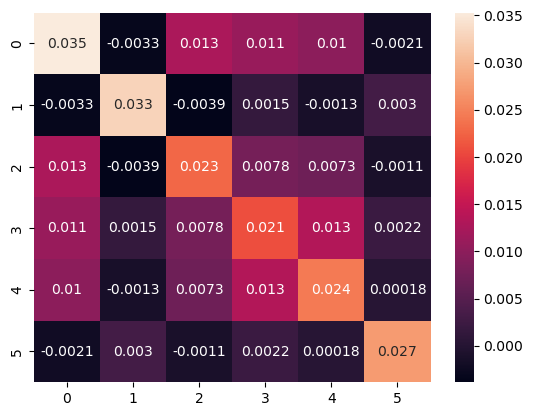

In [8]:
porcentaje,eivec=pca1(norm_min_max(data_b,0,1))
#np.cov(np.transpose(data_b)).shape
por=ordenar(porcentaje,data_b.columns)
print(por)

# K-Means

1. Se eligen aleatoriamente los k objetos que serán. los centroides.
2. se calcula la distancia de cada centroide a cada dato y se reasigna los objetos de acuerdo a la distancia mínima para cada dato.
3. Se recalcula el centroide para que sea el centro geométrico de mi cluster
4. repetir etapas 2 y 3 hasta que los centroides no cambien.

## Distancias
**Euclidiana**
$$d(x,y)=\sqrt{\sum_{i=1}^n (x_i-y_i)^2}$$

**Manhattan**
$$d(x,y)=\sum_{i=1}^n |x_i-y_i|$$

**Chebyshev**
$$d(x,y)=\max_{i=1,2,3,\cdots,n} |x_i-y_i|$$

**Coseno**
$$d(x,y)=\arccos \left(\frac{x \cdot y}{\left\lVert x \right\rVert \left\lVert y \right\rVert} \right)$$

**Distancia euclidiana normalizada**
$$d(x,y)=\sqrt{(x-y)^T S^{-1} (x-y)}$$
Donde $S^{-1}$ es una matriz con $\frac{1}{\sigma}$ en la diagonal

**D. Mahalanobis**
$$d(x,y)=\sqrt{(x-y)^T V^{-1}(x-y)}$$
Donde $V$ es la matriz de varianzas y covarianzas

In [9]:
def d_euc(a,b):
    return np.linalg.norm(a-b)

def d_manhattan(a,b):
    return np.sum(np.abs(a-b))

def k_means(data,n_c,distancia):

    cls=np.random.choice(data.shape[0],n_c,replace=False)
    clusters=data[cls,:]
    #print('clusters iniciales',clusters)
    ren,col=data.shape
    distancias=np.zeros((n_c,ren,1))
    d_ant=np.ones((n_c,ren,1))
    pert=np.zeros((ren,1))
    n_centroide=np.zeros((n_c,col))
    #print(n_centroide[0,:])
    cent=n_centroide+1
    iteracion=0
    #print('--------')
    #while not np.array_equal(cent,n_centroide) or iteracion<10: ##
    while iteracion<20 and not np.array_equal(cent,clusters):
        cent=np.copy(clusters)

        n_centroide=np.zeros((n_c,col))
        for ib in range(n_c):
            for ia in range(ren): # se calculan las distancias 
                distancias[ib,ia,0]=distancia(clusters[ib,:],data[ia,:])
        for ic in range(ren): # Observar el valor más cercano **************************************
            pert[ic,0]=np.where(distancias[:,ic,:]==min(distancias[:,ic,:]))[0][0]
        pert=pert.astype(int)
        #print(pert)
        for idd in range(ren):
            #print(pert[idd,0])
            n_centroide[pert[idd,0],:]+=data[idd,:]
        for abb in range(n_c):
            clusters[abb,:]=n_centroide[abb,:]/(np.count_nonzero(pert==abb))
            
        iteracion+=1
        
    #print(iteracion)
    return clusters,pert

# Método del codo (elbow method)

Formula para la inercia en cada cluster:

$$I(c_n)=\sum_{i=0}^{n_p}(d(centroid_{c_n},p_i)) \approx \sum_{i=0}^{n_p}(p_i-C_n)^2$$

Tomando en cuenta que:
* $I(c_n)$ es la inercia del $n$ cluster 
* $centroid_{c_n}$ es la coordenada del centroide del $n$ cluster  
* $p_i$ es un punto que pertenece a la clase $n$ 
* $n_p$ es el número de puntos que pertenecen a $n_c$ cluster (es decir ($p_i \in n_p \in c_n$))
Inercia total:

$$I_t=\frac{\sum_{i_{n}=0}^{n} I(i_n)}{n} $$

Donde:

* $I(i_n)$ es la inercia de cada cluster.
* $n$ es la cantidad de clusters que hay

In [10]:
def e_met(data,c_max,distancia):
    res=[]
    n_clus=range(1,c_max+1)
    temp=0
    ren,col=data.shape
    for a in range(c_max):
        r_sum=np.zeros((a+1,1))
        cluster,pert=k_means(data,a+1,distancia)
        for b in range(a+1):
            dt=np.where(pert==b)[0] #Grupo de cada dato
            for c in range(len(dt)):
                r_sum[b]+=distancia(cluster[b,:],data[dt[c],:])**2
                
            #r_sum[b]/=len(dt)
        temp=float(sum(r_sum[:]))/(a+1)
        res.append(temp)
        temp=0
    plt.plot(n_clus,res)
    plt.grid()
    plt.xticks(n_clus)
    plt.xlabel('Cantidad de clusters')
    plt.ylabel('Inercia')
    plt.title('Método del Codo')
    return res,n_clus

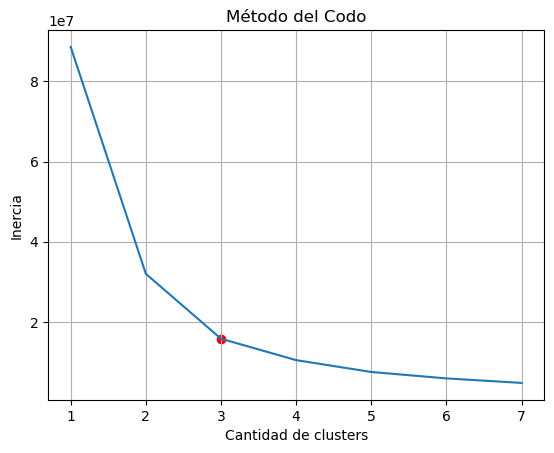

In [12]:
valor=3
inercia,n_cl=e_met(datab,7,d_euc)
plt.scatter(valor,inercia[valor-1],color='red')

In [13]:
res,lab=k_means(data_b.to_numpy(),3,d_euc)
res

array([[369.03546555,  47.20840588, 588.51900474, 516.61137185,
        471.3387733 , 212.8237487 ],
       [410.62633622,  37.82717092, 634.64592727, 555.77892748,
        542.90363175, 198.28446429],
       [486.98550288,  38.5829431 , 691.78747275, 601.08058458,
        599.95532171, 199.86543944]])

In [14]:
lab

array([[2],
       [1],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [0],
       [1],
       [1],
       [0],
       [2],
       [1],
       [1],
       [2],
       [1],
       [1],
       [2],
       [0],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [0],
       [1],
       [1],
       [1],
       [2],
       [1],
       [2],
       [2],
       [1],
       [0],
       [2],
       [1],
       [2],
       [1],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [2],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [0],
       [0],
    

# Clustering jerárquico

El algortimo de clúster jerárquico agrupa los datos basándose en la distancia entre cada uno y buscando que los datos que están dentro de un clúster sean los más similares entre sí.

Existen dos tipos de clustering, el basado en divisiones y el aglomerativo. Como se puede observar en el dendograma.

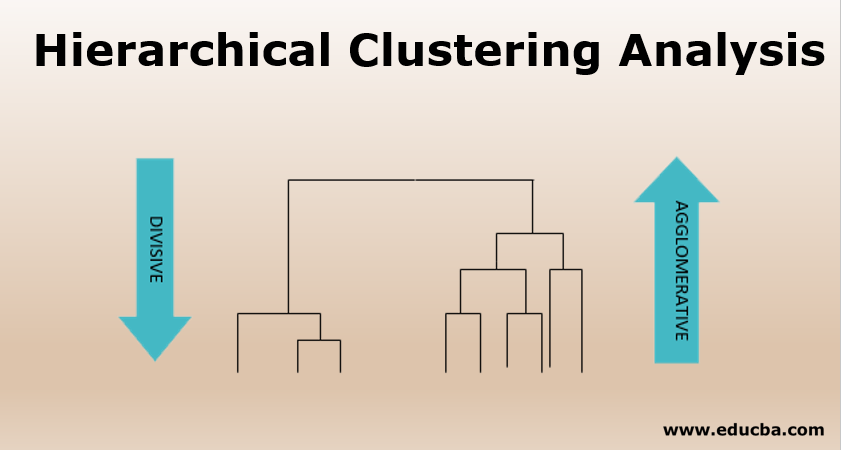

El basado en divisiones consiste en 

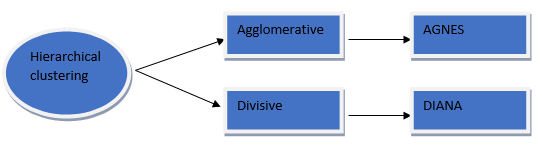


In [15]:
def agnes(data,distancia): #aglomerativo distancia miníma con k-means
    # partimos de que todos los puntos son un cluster diferente.
    d2=np.copy(data)
    d3=np.copy(data)
    ren,col=d2.shape
    n_cl=ren
    centroides=[]
    centroides.append(d2)
    distancias=np.zeros((n_cl,ren,1))
    print('inicio')
    while n_cl >1:
        distancias=np.zeros((n_cl,ren))
        for a in range(n_cl):
            for b in range(ren):
                if a==b:
                    distancias[a,b]=10000
                else:
                    distancias[a,b]=distancia(centroides[-1][a,:],d3[b,:])
        #mascara=np.eye(distancias.shape[0],dtype=bool)
        #dist_n=np.ma.array(distancias,mask=mascara)
        
        p_min=np.unravel_index(np.argmin(distancias),distancias.shape) 
        print('coord min',p_min) # checar valor
        #n_cl-=1
        # obtener promedio
        n_cluster=(d3[a,:]+d3[b,:])/2
        #print(np.transpose(n_cluster).shape)
        
        # eliminar clusters
        #print(distancias.shape)
        d3=np.delete(d3,(p_min[0],p_min[1]),axis=0)
        print(d3.shape)
        d3=np.vstack((d3,n_cluster))
        centroides.append(d3)
        ren2,col2=centroides[-1].shape
        n_cl=ren2
        distancias=np.zeros((n_cl,ren))
        ren,col=d3.shape
    return centroides

In [16]:
## Se tienen que ir haciendo las categorias primero y despues se van haciendo las mediciones
def agnesb(data,distancia): #aglomerativo distancia miníma con k-means
    # partimos de que todos los puntos son un cluster diferente.
    d2=np.copy(data)
    d3=np.copy(data)
    ren,col=d2.shape
    n_cl=ren
    centroides=[]
    #centroides.append(label)
    distancias=np.zeros((n_cl,ren,1))
    label=np.arange(ren).reshape(-1,1)
    #print(label)
    centroides.append(label)
    print('inicio')
    distancias=np.zeros((n_cl,ren))
    for a in range(n_cl):
        for b in range(ren):
            if a==b:
                distancias[a,b]=10000
            else:
                distancias[a,b]=distancia(d3[a,:],d3[b,:])
        #mascara=np.eye(distancias.shape[0],dtype=bool)
        #dist_n=np.ma.array(distancias,mask=mascara)
    d_ord=np.sort(distancias,axis=None)
    #print(d_ord.shape)
    r=d_ord.shape
    for xx in range(r[0]):
        if d_ord[xx]==10000:
            pass
        else:
            p_min=np.where(d_ord[xx]==distancias) 
            l2=len(np.unique(label))
            if p_min[0][0]==p_min[1][0]:
                pass
            #print(p_min)
            else:
                label=np.where(label==p_min[0][0],p_min[1][0],label)
                #print(len(np.unique(label)))
                if len(np.unique(label))!=l2:
                    centroides.append(label)
    #label=np.where(label==label[0],label[0],label)
    return centroides

In [17]:
import time
t1=time.time()
cent=agnesb(data_b,d_euc)
t2=time.time()
print('tiempo: ',t2-t1)

inicio
tiempo:  70.71974444389343


In [18]:
print(len(cent))
val=cent[-3]
valores_unicos, frecuencias = np.unique(val, return_counts=True)

# Imprimir los valores y sus frecuencias
for valor, frecuencia in zip(valores_unicos, frecuencias):
    print("Valor:", valor, "- Frecuencia:", frecuencia)

400
Valor: 386 - Frecuencia: 2
Valor: 392 - Frecuencia: 2
Valor: 399 - Frecuencia: 396


In [19]:
def ajustar(clusters,data,distancia):
    n_clus,atrib=clusters.shape
    ren,col=data.shape
    pert=np.zeros((ren,1))
    d_clus=np.zeros((1,n_clus))
    for a in range(ren):
        for b in range(n_clus):
            d_clus[0,b]=distancia(clusters[b,:],data[a,:])
            #print(d_clus[0,b])
        #print(d_clus)
        pert[a,0]=np.where(d_clus==d_clus.min())[1][0]
        d_clus=np.zeros((1,n_clus))
        #print('fin')
        pert=pert.astype(int)
    return pert

In [20]:
def calc_centroide(labels,data,distancia):
    v=len(np.unique(labels))
    ren,col=data.shape
    centroide=np.zeros((v,col))
    valores_unicos, frecuencias = np.unique(labels, return_counts=True)
    temp=0
    print(valores_unicos)
    print(frecuencias)
    # Imprimir los valores y sus frecuencias
    for a in range(len(valores_unicos)):
        for b in range(ren):
            if int(labels[b])==valores_unicos[a]:
                #centroide[a,:]+=data[b,:]
                centroide[a,:]=centroide[a,:]+data[b,:]
        centroide[a,:]/=frecuencias[a]
    return centroide

In [21]:
cent_jerarquico=calc_centroide(cent[-3],data_b.to_numpy(),d_euc)
print(cent_jerarquico)

[386 392 399]
[  2   2 396]
[[435.26355571  35.97343131 682.10702496 724.39561484 762.82250939
  242.27138334]
 [354.88562042  22.32740514 478.75114501 439.2303629  430.70200065
   97.84635199]
 [420.93030928  40.4387363  639.07378783 557.94917736 539.92052193
  202.59086738]]


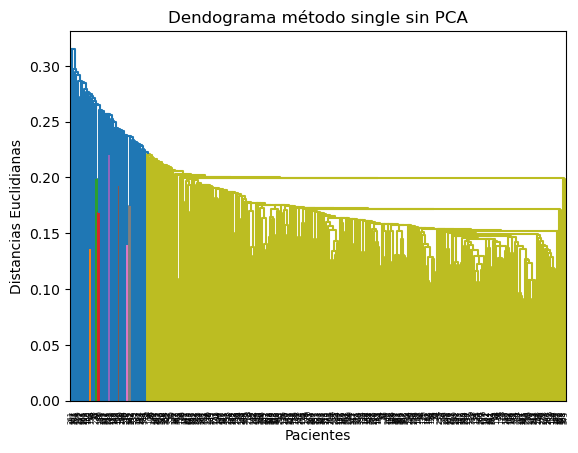

In [68]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(norm_min_max(data_b,0,1), method = 'single'))

plt.title('Dendograma método single sin PCA')
plt.xlabel('Pacientes')
plt.ylabel('Distancias Euclidianas')
plt.show()

# Métricas de evaluación.

[calinski coeficient](https://pyshark.com/calinski-harabasz-index-for-k-means-clustering-evaluation-using-python/)
1. intercluster dispersión
$$BSGG=\sum_{i=1}^K n_k \times ||C_k-C||^2$$

donde:


In [23]:
def bgss(data,centroids,frec):
    nc,col2=centroids.shape
    ren,col=data.shape
    temp=0
    baricentro=np.sum(data)/ren
    for a in range(nc):
        temp+=d_euc(centroids[a,:],baricentro)**2
        temp*=frec[a]
    return temp

def wgss(data, labels, centroid):
    num_clusters = len(np.unique(labels))
    total_dispersion = 0.0

    for cluster in range(num_clusters):
        cluster_data = data[labels == cluster]
        cluster_centroid = centroid[cluster]

        # Calcular la distancia Euclidiana entre cada punto del cluster y el centroide
        distances = np.linalg.norm(cluster_data - cluster_centroid, axis=1)
        
        # Sumar las distancias al total de dispersión intra-cluster
        total_dispersion += np.sum(distances)

    return total_dispersion
 
def calinski(v1,v2,data,clusters):
    ren,col=data.shape
    r,c=clusters.shape
    return ((v1/(r-1))/(v2/(ren-r)))

In [24]:
#Métricas para 6 atributos kmeans
valores_unicos, frecuencias = np.unique(lab, return_counts=True)
v1=bgss(data_b.to_numpy(),res,frecuencias)
v2=wgss(data_b,lab,res)
cal=calinski(v1,v2,data_b,res)
print(cal)

271743655705.28818


In [25]:
# Métrica para 6 atributos jerarquico
# numero de clusters
nc=3
valores_unicos, frecuencias = np.unique(cent[-nc], return_counts=True)
t=0
for a in valores_unicos:
    cent[-nc]=np.where(cent[-nc]==a,t,cent[-nc])
    #label=np.where(label==p_min[0][0],p_min[1][0],label)
    valores_unicos=np.where(valores_unicos==a,t,valores_unicos)
    t+=1
cent_jerarquico1=calc_centroide(cent[-nc],data_b.to_numpy(),d_euc) #
v1=bgss(data_b.to_numpy(),cent_jerarquico1,frecuencias)
v2=wgss(data_b,cent[-nc],cent_jerarquico1)
cal=calinski(v1,v2,data_b,res)
print(cal)

[0 1 2]
[  2   2 396]
283646668.5482213


## Uso  de PCA

{'d_cg': 36.04072130342554, 'd_lab': 21.34712266379575, 'd_nas_men': 16.032413373957308, 'd_nas_sub': 12.442237832788472, 'd_gon_ment': 8.892535879862113, 'd_sup_inf': 5.244968946170824}

se puede considerar 4 atributos como los más importantes

In [26]:
db2=data_b[['d_cg','d_lab','d_nas_men','d_nas_sub']]

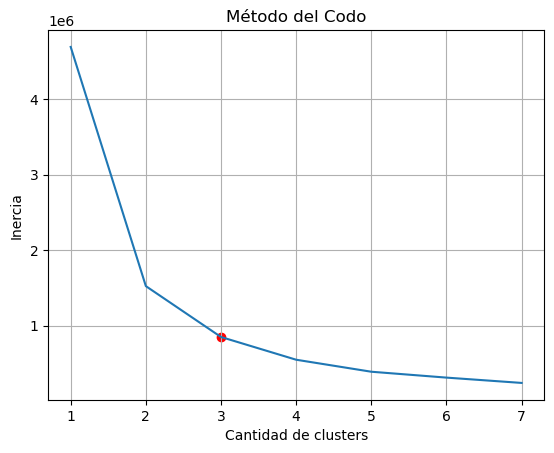

In [27]:
## Kmeans
valor=3
inercia,n_cl=e_met(db2.to_numpy(),7,d_euc)
plt.scatter(valor,inercia[valor-1],color='red')

In [28]:
res,lab2=k_means(db2.to_numpy(),3,d_euc)
res

array([[402.06225828, 211.94061219, 470.15935354, 527.47589004],
       [380.73076954, 193.28562875, 556.23990077, 552.19316474],
       [480.27095901, 201.70119434, 595.24238698, 595.26329982]])

In [70]:
# Métrica con 3 atributos
valores_unicos, frecuencias = np.unique(lab, return_counts=True)
v1=bgss(db2.to_numpy(),res,frecuencias)
v2=wgss(db2,lab,res)
cal=calinski(v1,v2,data_b,res)
print(cal)

88219130996.91548


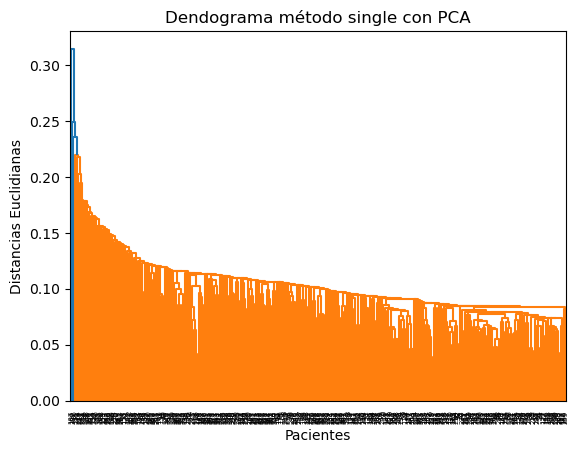

In [67]:
## kmeans jerarquico
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(norm_min_max(db2,0,1), method = 'single'))

plt.title('Dendograma método single con PCA')
plt.xlabel('Pacientes')
plt.ylabel('Distancias Euclidianas')
plt.show()

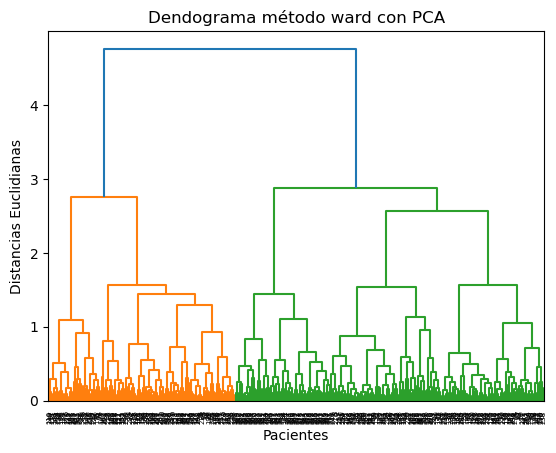

In [69]:
## kmeans jerarquico
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(norm_min_max(db2,0,1), method = 'ward'))

plt.title('Dendograma método ward con PCA')
plt.xlabel('Pacientes')
plt.ylabel('Distancias Euclidianas')
plt.show()

In [32]:
import time
t1=time.time()
cent=agnesb(db2,d_euc)
t2=time.time()
print('tiempo: ',t2-t1)

inicio
tiempo:  72.25643992424011


In [33]:
nc=3
valores_unicos, frecuencias = np.unique(cent[-nc], return_counts=True)
t=0
for a in valores_unicos:
    cent[-nc]=np.where(cent[-nc]==a,t,cent[-nc])
    #label=np.where(label==p_min[0][0],p_min[1][0],label)
    valores_unicos=np.where(valores_unicos==a,t,valores_unicos)
    t+=1
cent_jerarquico2=calc_centroide(cent[-nc],db2.to_numpy(),d_euc)
v1=bgss(db2.to_numpy(),cent_jerarquico2,frecuencias)
v2=wgss(db2,cent[-nc],cent_jerarquico2)
cal=calinski(v1,v2,data_b,res)
print(cal)

[0 1 2]
[107  23 270]
23017285642.99188


# Método ward

In [34]:
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster

linkage_matrix = linkage(data_b.to_numpy(), method='ward')

In [35]:
threshold = 2.5
clusters = fcluster(linkage_matrix, threshold, criterion='distance')

In [36]:
centroids = []
for cluster_id in np.unique(clusters):
    points = data_b.to_numpy()[clusters == cluster_id]
    centroid = np.mean(points, axis=0)
    centroids.append(centroid)

# Imprimir los centroides de los clusters
#for i, centroid in enumerate(centroids):
#    print(f"Centroide del Cluster {i+1}: {centroid}")

In [37]:
centroides=np.asarray(centroids)

In [38]:
centroides.shape

(400, 6)

In [39]:
centroides_ward1,labels=k_means(centroides,3,d_euc)

In [40]:
centroides_ward1.shape

(3, 6)

In [41]:
lab_ward1=ajustar(centroides_ward1,data_b.to_numpy(),d_euc)

In [42]:
lab_ward1
#Métricas
valores_unicos, frecuencias = np.unique(lab_ward1, return_counts=True)
v1=bgss(data_b.to_numpy(),res,frecuencias)
v2=wgss(data_b,lab_ward1,centroides_ward1)
cal=calinski(v1,v2,data_b,centroides_ward1)
print(cal)

197819512201.3204


In [43]:
## Con PCA
linkage_matrix = linkage(db2.to_numpy(), method='ward')
threshold = 0.01
clusters_wardpca = fcluster(linkage_matrix, threshold, criterion='distance')

centroids_ward_pca = []
for cluster_id in np.unique(clusters_wardpca):
    points = db2.to_numpy()[clusters_wardpca == cluster_id]
    centroid = np.mean(points, axis=0)
    centroids_ward_pca.append(centroid)

In [44]:
centroids_ward_pca=np.asarray(centroids_ward_pca)
#print(centroids_ward_pca.shape)

In [45]:
centroides_ward2,labels2=k_means(centroids_ward_pca,3,d_euc)
lab_ward2=ajustar(centroides_ward2,db2.to_numpy(),d_euc)

In [46]:
#Métricas ward pca
valores_unicos, frecuencias = np.unique(lab_ward2, return_counts=True)
v1=bgss(db2.to_numpy(),centroides_ward2,frecuencias)
v2=wgss(db2,lab_ward2,centroides_ward2)
cal=calinski(v1,v2,db2,centroides_ward2)
print(cal)

112108746729.70982


In [48]:
## Calcular algun porcentaje de similitud con los otros méto
lab_h1=ajustar(cent_jerarquico1,data_b.to_numpy(),d_euc)
lab_h2=ajustar(cent_jerarquico2,db2.to_numpy(),d_euc)

In [49]:
# lab, lab2, labels1,labels2

In [56]:
# similitud entre métodos.
met=list([lab,lab2,lab_h1,lab_h2,lab_ward1,lab_ward2])

In [58]:
m_sim=np.zeros((6,6))
for a in range(len(met)):
    for b in range(len(met)):
        m_sim[a,b]=np.count_nonzero(met[a]==met[b])/400
        

In [59]:
m_sim

array([[1.    , 0.7275, 0.2425, 0.0675, 0.3025, 0.73  ],
       [0.7275, 1.    , 0.3075, 0.0575, 0.2625, 0.9925],
       [0.2425, 0.3075, 1.    , 0.475 , 0.3675, 0.31  ],
       [0.0675, 0.0575, 0.475 , 1.    , 0.53  , 0.055 ],
       [0.3025, 0.2625, 0.3675, 0.53  , 1.    , 0.26  ],
       [0.73  , 0.9925, 0.31  , 0.055 , 0.26  , 1.    ]])

<AxesSubplot:>

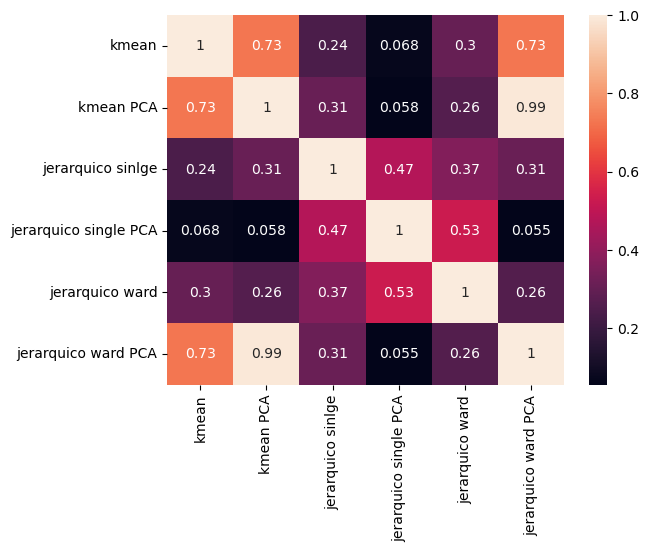

In [63]:
xlab=['kmean','kmean PCA','jerarquico sinlge','jerarquico single PCA','jerarquico ward','jerarquico ward PCA']
sns.heatmap(m_sim,annot=True,xticklabels=xlab,yticklabels=xlab)


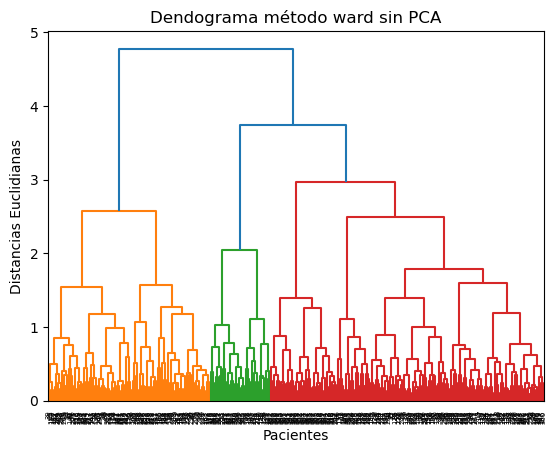

In [66]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(norm_min_max(data_b,0,1), method = 'ward'))

plt.title('Dendograma método ward sin PCA')
plt.xlabel('Pacientes')
plt.ylabel('Distancias Euclidianas')
plt.show()

In [80]:
aa,bb=m_sim.shape
summ=np.zeros((aa,1))
for a in range(aa):
    summ[a]=sum(m_sim[a,:])
        
print((summ-1)/5)

[[0.414 ]
 [0.4695]
 [0.3405]
 [0.237 ]
 [0.3445]
 [0.4695]]


In [76]:
df.head()

,1_x,1_y,2_x,2_y,3_x,3_y,4_x,4_y,5_x,5_y,...,15_x,15_y,16_x,16_y,17_x,17_y,18_x,18_y,19_x,19_y
0,806,1028,1384,972,1258,1218,591,1212,1406,1579,...,1530,1546,1471,2136,954,1447,1366,1504,649,1261
1,847,1121,1407,1118,1250,1362,601,1218,1331,1671,...,1417,1666,1388,2245,941,1533,1383,1600,741,1441
2,819,1084,1457,1105,1282,1337,563,1232,1359,1625,...,1498,1670,1467,2192,947,1530,1393,1602,604,1302
3,782,1003,1369,936,1236,1200,570,1178,1373,1448,...,1487,1420,1429,2003,958,1401,1420,1371,613,1239
4,799,1039,1469,955,1264,1225,623,1204,1447,1571,...,1574,1536,1644,2167,983,1445,1441,1487,662,1353


In [82]:
d_ceph.tail()

,image_path,1_x,1_y,2_x,2_y,3_x,3_y,4_x,4_y,5_x,...,15_x,15_y,16_x,16_y,17_x,17_y,18_x,18_y,19_x,19_y
145,057.jpg,760,1059,1359,933,1243,1199,559,1277,1375,...,1464,1417,1364,1938,975,1410,1381,1382,671,1370
146,038.jpg,815,1042,1379,1074,1250,1307,569,1211,1291,...,1455,1603,1260,2094,908,1471,1331,1562,626,1318
147,013.jpg,753,1037,1348,1018,1171,1276,526,1192,1257,...,1383,1546,1356,2045,898,1425,1299,1507,603,1247
148,003.jpg,761,1105,1329,911,1250,1181,622,1279,1436,...,1524,1369,1526,1923,1008,1404,1420,1350,712,1348
149,037.jpg,808,1025,1393,1050,1233,1299,581,1200,1318,...,1401,1620,1470,2169,922,1449,1344,1544,647,1259


In [88]:
lab[:10,]

array([[2],
       [1],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1],
       [0],
       [1]])

In [89]:
d_ceph.head(10)

,image_path,1_x,1_y,2_x,2_y,3_x,3_y,4_x,4_y,5_x,...,15_x,15_y,16_x,16_y,17_x,17_y,18_x,18_y,19_x,19_y
0,017.jpg,806,1028,1384,972,1258,1218,591,1212,1406,...,1530,1546,1471,2136,954,1447,1366,1504,649,1261
1,121.jpg,847,1121,1407,1118,1250,1362,601,1218,1331,...,1417,1666,1388,2245,941,1533,1383,1600,741,1441
2,033.jpg,819,1084,1457,1105,1282,1337,563,1232,1359,...,1498,1670,1467,2192,947,1530,1393,1602,604,1302
3,093.jpg,782,1003,1369,936,1236,1200,570,1178,1373,...,1487,1420,1429,2003,958,1401,1420,1371,613,1239
4,052.jpg,799,1039,1469,955,1264,1225,623,1204,1447,...,1574,1536,1644,2167,983,1445,1441,1487,662,1353
5,045.jpg,739,1084,1319,935,1236,1191,588,1248,1366,...,1485,1455,1384,1961,946,1415,1373,1409,639,1298
6,021.jpg,816,1089,1425,1037,1256,1308,577,1250,1269,...,1446,1634,1274,2221,901,1508,1335,1552,643,1367
7,029.jpg,765,1038,1396,970,1237,1224,647,1210,1411,...,1512,1488,1440,2074,973,1452,1406,1434,660,1363
8,080.jpg,819,1082,1354,1079,1226,1288,584,1198,1294,...,1422,1522,1302,2060,921,1403,1333,1481,646,1285
9,030.jpg,822,1056,1345,1007,1247,1267,597,1262,1313,...,1458,1575,1390,2134,946,1501,1315,1523,674,1351
